## Carvana Cars Web Scraper
In this project, we'll explore the data and investigate if there are any differences amonsgt what drives a car's price at Carvana. Carvana is a used-car retailer well known for its "car vending machines" which can be seen at their locations. Carvana does also accept trade-in offers for those looking for an upgrade.

Since used-cars are currently reported to be inflated, I believe this analysis could be helpful to those considering Carvana to trade their vehicle to. This can at least provide some assurance based on the data scraped, the value you could expect your car to be sold for at Carvana and get a fair quote. 

In [2]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
from pprint import pprint
import time 
import re
import json
import gc
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import warnings
warnings.filterwarnings('ignore')

Below, we'll set a scraper to obtain cars up for sale on Carvana. I'll first scrape the second page of listings since it is the first page with an index number for the pages to scrape.

In [3]:
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

URL = "https://www.carvana.com/cars?page=2"

In [105]:
r = requests.get(URL, headers = headers)
   
content = r.content 
soup = BeautifulSoup(content, 'lxml') 


<!DOCTYPE html>
<html lang="en"><head><script>googleTagManagerId = 'GTM-PCCP2G';</script><script>(function (w, d, s, l, i) {
            w[l] = w[l] || [];
            w[l].push({
                'gtm.start': new Date().getTime(),
                event: 'gtm.js'
            });
            var f = d.getElementsByTagName(s)[0],
                j = d.createElement(s),
                dl = l != 'dataLayer' ? '&l=' + l : '';
            j.async = true;
            j.src =
                'https://www.googletagmanager.com/gtm.js?id=' + i + dl;
            f.parentNode.insertBefore(j, f);
        })(window, document, 'script', 'dataLayer', googleTagManagerId);</script><meta charset="utf-8"/><meta content="#000000" name="theme-color"/><meta content="width=device-width,initial-scale=1,minimum-scale=1,maximum-scale=1,user-scalable=no" name="viewport"/><meta content="google4c36c0b263bbf066.html" name="google-site-verification"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><link href="ht
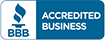

In [106]:
soup

In [107]:
result_tiles = soup.find_all('div', {'class' :'result-tile'})

In [108]:
result_tiles

[<div class="result-tile" data-qa="result-tile" data-test="ResultTile"><a href="/vehicle/2304402"><div class="tk-shell"><div class="tk-frame top-frame" data-qa="frame" data-test="Frame"><picture class="vehicle-image" data-qa="base-vehicle-image" data-test="BaseVehicleImage"><source media="(min-width: 650px)" srcset="//cdnblob.fastly.carvana.io/2001700784/post-large/normalized/zoomcrop/2001700784-edc-02.jpg?v=2022.4.19_0.58.11&amp;width=449"/><source media="(min-width: 0px)" srcset="//cdnblob.fastly.carvana.io/2001700784/post-large/normalized/zoomcrop/2001700784-edc-02.jpg?v=2022.4.19_0.58.11&amp;width=347"/><img alt="2018 GMC Terrain" loading="lazy" src="//cdnblob.fastly.carvana.io/2001700784/post-large/normalized/zoomcrop/2001700784-edc-02.jpg?v=2022.4.19_0.58.11&amp;width=347"/></picture><div class="tk-pane" data-qa="pane" data-test="Pane"></div><div class="tk-pane" data-qa="pane" data-test="Pane"><div aria-pressed="false" class="favorite-vehicle" data-qa="base-favorite-vehicle" data

In [109]:
vehicle_links = []

for tile in result_tiles:
    temp = tile.find('a', href=True)
    
    vehicle_links.append(temp.get('href'))

In [110]:
vehicle_links

['/vehicle/2304402',
 '/vehicle/2273159',
 '/vehicle/2202214',
 '/vehicle/2175459',
 '/vehicle/2346364',
 '/vehicle/2314790',
 '/vehicle/2311174',
 '/vehicle/2291502',
 '/vehicle/2355536',
 '/vehicle/2353148',
 '/vehicle/2311184',
 '/vehicle/2242864',
 '/vehicle/2379614',
 '/vehicle/2243202',
 '/vehicle/2179044',
 '/vehicle/2346592',
 '/vehicle/2349675',
 '/vehicle/2318330',
 '/vehicle/2337511',
 '/vehicle/2352380',
 '/vehicle/2198580']

Let's make a loop here to find and scrape the vehicle pages from the web paeg listing results from Carvana.

If we wanted to, we could come back and create a function to perform this operation. The runtime for the overall process to occur, however, can take a very long time.

In [7]:
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

URL = "https://www.carvana.com/cars?page="#+number

In [8]:
vehicle_links = []
mini_url = "https://www.carvana.com"

#We will scrape about 2000 pages from the website. 
for i in range(2, 2001, 1):
    time.sleep(2)
    r = requests.get(URL+str(i), headers = headers)
    time.sleep(2)
    content = r.content 
    soup = BeautifulSoup(content, 'lxml') 
    
    result_tiles = soup.find_all('div', {'class' :'result-tile'})
    
    for tile in result_tiles:
        temp = tile.find('a', href=True)
    
        vehicle_links.append(temp.get('href'))
    
    print(f"Links for Page#{i} acquired")
    
    gc.collect()


Links for Page#2 acquired
Links for Page#3 acquired
Links for Page#4 acquired
Links for Page#5 acquired
Links for Page#6 acquired
Links for Page#7 acquired
Links for Page#8 acquired
Links for Page#9 acquired
Links for Page#10 acquired
Links for Page#11 acquired
Links for Page#12 acquired
Links for Page#13 acquired
Links for Page#14 acquired
Links for Page#15 acquired
Links for Page#16 acquired
Links for Page#17 acquired
Links for Page#18 acquired
Links for Page#19 acquired
Links for Page#20 acquired
Links for Page#21 acquired
Links for Page#22 acquired
Links for Page#23 acquired
Links for Page#24 acquired
Links for Page#25 acquired
Links for Page#26 acquired
Links for Page#27 acquired
Links for Page#28 acquired
Links for Page#29 acquired
Links for Page#30 acquired
Links for Page#31 acquired
Links for Page#32 acquired
Links for Page#33 acquired
Links for Page#34 acquired
Links for Page#35 acquired
Links for Page#36 acquired
Links for Page#37 acquired
Links for Page#38 acquired
Links for

Links for Page#299 acquired
Links for Page#300 acquired
Links for Page#301 acquired
Links for Page#302 acquired
Links for Page#303 acquired
Links for Page#304 acquired
Links for Page#305 acquired
Links for Page#306 acquired
Links for Page#307 acquired
Links for Page#308 acquired
Links for Page#309 acquired
Links for Page#310 acquired
Links for Page#311 acquired
Links for Page#312 acquired
Links for Page#313 acquired
Links for Page#314 acquired
Links for Page#315 acquired
Links for Page#316 acquired
Links for Page#317 acquired
Links for Page#318 acquired
Links for Page#319 acquired
Links for Page#320 acquired
Links for Page#321 acquired
Links for Page#322 acquired
Links for Page#323 acquired
Links for Page#324 acquired
Links for Page#325 acquired
Links for Page#326 acquired
Links for Page#327 acquired
Links for Page#328 acquired
Links for Page#329 acquired
Links for Page#330 acquired
Links for Page#331 acquired
Links for Page#332 acquired
Links for Page#333 acquired
Links for Page#334 a

Links for Page#592 acquired
Links for Page#593 acquired
Links for Page#594 acquired
Links for Page#595 acquired
Links for Page#596 acquired
Links for Page#597 acquired
Links for Page#598 acquired
Links for Page#599 acquired
Links for Page#600 acquired
Links for Page#601 acquired
Links for Page#602 acquired
Links for Page#603 acquired
Links for Page#604 acquired
Links for Page#605 acquired
Links for Page#606 acquired
Links for Page#607 acquired
Links for Page#608 acquired
Links for Page#609 acquired
Links for Page#610 acquired
Links for Page#611 acquired
Links for Page#612 acquired
Links for Page#613 acquired
Links for Page#614 acquired
Links for Page#615 acquired
Links for Page#616 acquired
Links for Page#617 acquired
Links for Page#618 acquired
Links for Page#619 acquired
Links for Page#620 acquired
Links for Page#621 acquired
Links for Page#622 acquired
Links for Page#623 acquired
Links for Page#624 acquired
Links for Page#625 acquired
Links for Page#626 acquired
Links for Page#627 a

Links for Page#885 acquired
Links for Page#886 acquired
Links for Page#887 acquired
Links for Page#888 acquired
Links for Page#889 acquired
Links for Page#890 acquired
Links for Page#891 acquired
Links for Page#892 acquired
Links for Page#893 acquired
Links for Page#894 acquired
Links for Page#895 acquired
Links for Page#896 acquired
Links for Page#897 acquired
Links for Page#898 acquired
Links for Page#899 acquired
Links for Page#900 acquired
Links for Page#901 acquired
Links for Page#902 acquired
Links for Page#903 acquired
Links for Page#904 acquired
Links for Page#905 acquired
Links for Page#906 acquired
Links for Page#907 acquired
Links for Page#908 acquired
Links for Page#909 acquired
Links for Page#910 acquired
Links for Page#911 acquired
Links for Page#912 acquired
Links for Page#913 acquired
Links for Page#914 acquired
Links for Page#915 acquired
Links for Page#916 acquired
Links for Page#917 acquired
Links for Page#918 acquired
Links for Page#919 acquired
Links for Page#920 a

Links for Page#1172 acquired
Links for Page#1173 acquired
Links for Page#1174 acquired
Links for Page#1175 acquired
Links for Page#1176 acquired
Links for Page#1177 acquired
Links for Page#1178 acquired
Links for Page#1179 acquired
Links for Page#1180 acquired
Links for Page#1181 acquired
Links for Page#1182 acquired
Links for Page#1183 acquired
Links for Page#1184 acquired
Links for Page#1185 acquired
Links for Page#1186 acquired
Links for Page#1187 acquired
Links for Page#1188 acquired
Links for Page#1189 acquired
Links for Page#1190 acquired
Links for Page#1191 acquired
Links for Page#1192 acquired
Links for Page#1193 acquired
Links for Page#1194 acquired
Links for Page#1195 acquired
Links for Page#1196 acquired
Links for Page#1197 acquired
Links for Page#1198 acquired
Links for Page#1199 acquired
Links for Page#1200 acquired
Links for Page#1201 acquired
Links for Page#1202 acquired
Links for Page#1203 acquired
Links for Page#1204 acquired
Links for Page#1205 acquired
Links for Page

Links for Page#1455 acquired
Links for Page#1456 acquired
Links for Page#1457 acquired
Links for Page#1458 acquired
Links for Page#1459 acquired
Links for Page#1460 acquired
Links for Page#1461 acquired
Links for Page#1462 acquired
Links for Page#1463 acquired
Links for Page#1464 acquired
Links for Page#1465 acquired
Links for Page#1466 acquired
Links for Page#1467 acquired
Links for Page#1468 acquired
Links for Page#1469 acquired
Links for Page#1470 acquired
Links for Page#1471 acquired
Links for Page#1472 acquired
Links for Page#1473 acquired
Links for Page#1474 acquired
Links for Page#1475 acquired
Links for Page#1476 acquired
Links for Page#1477 acquired
Links for Page#1478 acquired
Links for Page#1479 acquired
Links for Page#1480 acquired
Links for Page#1481 acquired
Links for Page#1482 acquired
Links for Page#1483 acquired
Links for Page#1484 acquired
Links for Page#1485 acquired
Links for Page#1486 acquired
Links for Page#1487 acquired
Links for Page#1488 acquired
Links for Page

Links for Page#1738 acquired
Links for Page#1739 acquired
Links for Page#1740 acquired
Links for Page#1741 acquired
Links for Page#1742 acquired
Links for Page#1743 acquired
Links for Page#1744 acquired
Links for Page#1745 acquired
Links for Page#1746 acquired
Links for Page#1747 acquired
Links for Page#1748 acquired
Links for Page#1749 acquired
Links for Page#1750 acquired
Links for Page#1751 acquired
Links for Page#1752 acquired
Links for Page#1753 acquired
Links for Page#1754 acquired
Links for Page#1755 acquired
Links for Page#1756 acquired
Links for Page#1757 acquired
Links for Page#1758 acquired
Links for Page#1759 acquired
Links for Page#1760 acquired
Links for Page#1761 acquired
Links for Page#1762 acquired
Links for Page#1763 acquired
Links for Page#1764 acquired
Links for Page#1765 acquired
Links for Page#1766 acquired
Links for Page#1767 acquired
Links for Page#1768 acquired
Links for Page#1769 acquired
Links for Page#1770 acquired
Links for Page#1771 acquired
Links for Page

In [9]:
print(vehicle_links[:15])

['/vehicle/2337967', '/vehicle/2100580', '/vehicle/2301668', '/vehicle/2221677', '/vehicle/2338093', '/vehicle/2341510', '/vehicle/2327619', '/vehicle/2379399', '/vehicle/1994495', '/vehicle/2230000', '/vehicle/2334804', '/vehicle/2231217', '/vehicle/2082518', '/vehicle/2369577', '/vehicle/2267430']


In [10]:
print(len(vehicle_links))

41981


In [11]:
g = pd.Series(vehicle_links).value_counts()

In [12]:
g

/vehicle/2261178    13
/vehicle/2312984    13
/vehicle/2288837    13
/vehicle/2319039    12
/vehicle/2125713    12
                    ..
/vehicle/2217007     1
/vehicle/2291867     1
/vehicle/2316938     1
/vehicle/2316936     1
/vehicle/2335063     1
Length: 12664, dtype: int64

In [13]:
uni_vehicle_links = np.unique(vehicle_links).tolist()

In [14]:
print(len(uni_vehicle_links))

12664


In [4]:
saved_vehicle_links = pd.read_csv("vehicle_links.csv")

In [5]:
saved_vehicle_links.head()

,Unnamed: 0,links
0,0,/vehicle/1730341
1,1,/vehicle/1743870
2,2,/vehicle/1752217
3,3,/vehicle/1762118
4,4,/vehicle/1764740


In [8]:
uni_vehicle_links = saved_vehicle_links['links'].tolist()

Here, we create a dataframe to save and store the car information we will scrape from the vehicle links we obtained above. The vehicle information is contained within a json script, and each page has some javascript elements to load. Therefore we'll need to use Selenium to obtain all the information from the unique vehicles we parsed.

In [20]:
carvana_df_2 = pd.DataFrame(columns=['make', 'model', 'trim', 'year', 'mileage', 'price', 'city', 'state', 'mpgCity', 'mpgHighway', 'engineCyclinderCount', 'engineDesc', 'fuel', 'driveTrain', 'exteriorColor', 'interiorColor', 'transmission', 'numberOfKeys', 'doors', 'seating', 'curbWeight', 'facets', 'AC', 'PowerWindows', 'CDPlayer', 'PowerLocks', 'TiltWheel', 'PowerSeats', 'imperfections'])
carvana_df_2

,make,model,trim,year,mileage,price,city,state,mpgCity,mpgHighway,engineCyclinderCount,engineDesc,fuel,driveTrain,exteriorColor,interiorColor,transmission,numberOfKeys,doors,seating,curbWeight,facets,AC,PowerWindows,CDPlayer,PowerLocks,TiltWheel,PowerSeats,imperfections


In [21]:
mini_url = "https://www.carvana.com"

In [23]:
for i, link in enumerate(uni_vehicle_links):

    PATH = "C:\Program Files (x86)\chromedriver.exe"

    options = Options()
    chrome_prefs = {}
    options.experimental_options["prefs"] = chrome_prefs
    chrome_prefs["profile.default_content_settings"] = {"javascript": 2}
    chrome_prefs["profile.managed_default_content_settings"] = {"javascript": 2}
    options.add_experimental_option("prefs",{'profile.managed_default_content_settings.javascript': 2})

    #options.add_argument('--headless')
    #options.add_argument('--disable-gpu')
    driver = webdriver.Chrome(PATH, options=options)#, chrome_options=options)
    driver.get(mini_url+link)
    time.sleep(2)
    page = driver.page_source
    driver.quit()
    
    #time.sleep(1)
    #r = requests.get(mini_url+link, headers = headers)
    #page = r.content
    #time.sleep(1)
    
    soup = BeautifulSoup(page, 'html.parser')
    
    soup_t = soup.find('script', attrs={'id':'__NEXT_DATA__'})
    
    try:
        soup_t_json = json.loads(soup_t.contents[0])
    except AttributeError:
        soup_t_json = soup_t
    except TypeError:
        soup_t_json = soup_t
    
    try:
        make = soup_t_json['props']['pageProps']['initialState']['vehicleDetails']['header']['make']
    except KeyError:
        make = np.nan
    except AttributeError:
        make = np.nan
    except TypeError:
        make = np.nan
    
    try:
        model = soup_t_json['props']['pageProps']['initialState']['vehicleDetails']['header']['model']
    except KeyError:
        model = np.nan
    except AttributeError:
        model = np.nan
    except TypeError:
        model = np.nan
        
    try:
        year = soup_t_json['props']['pageProps']['initialState']['vehicleDetails']['header']['year']
    except KeyError:
        year = np.nan
    except AttributeError:
        year = np.nan
    except TypeError:
        year = np.nan
        
    try:
        trim = soup_t_json['props']['pageProps']['initialState']['vehicleDetails']['header']['trim']
    except KeyError:
        trim = np.nan
    except AttributeError:
        trim = np.nan
    except TypeError:
        trim = np.nan
        
    try:
        price = soup_t_json['props']['pageProps']['initialState']['vehicleDetails']['header']['price']
    except KeyError:
        price = np.nan
    except AttributeError:
        price = np.nan
    except TypeError:
        price = np.nan
        
    try:
        mileage = soup_t_json['props']['pageProps']['initialState']['vehicleDetails']['header']['mileage']
    except KeyError:
        mileage = np.nan
    except AttributeError:
        mileage = np.nan
    except TypeError:
        mileage = np.nan
    
    try:
        city = soup_t_json['props']['pageProps']['initialState']['vehicleDetails']['header']['location']['city']
    except KeyError:
        city = np.nan
    except AttributeError:
        city = np.nan
    except TypeError:
        city = np.nan
        
    try:
        state = soup_t_json['props']['pageProps']['initialState']['vehicleDetails']['header']['location']['stateAbbreviation']
    except KeyError:
        state = np.nan
    except AttributeError:
        state = np.nan
    except TypeError:
        state = np.nan
    
    try:
        mpgCity = soup_t_json['props']['pageProps']['initialState']['vehicleDetails']['details']['basics']['mpgCity']
    except KeyError:
        mpgCity = np.nan
    except AttributeError:
        mpgCity = np.nan
    except TypeError:
        mpgCity = np.nan
        
    try:
        mpgHighway = soup_t_json['props']['pageProps']['initialState']['vehicleDetails']['details']['basics']['mpgHighway']
    except KeyError:
        mpgHighway = np.nan
    except AttributeError:
        mpgHighway = np.nan
    except TypeError:
        mpgHighway = np.nan
        
    try:
        engine_cyl_cnt = soup_t_json['props']['pageProps']['initialState']['vehicleDetails']['details']['basics']['engineCylinderCount']
    except KeyError:
        engine_cyl_cnt = np.nan
    except AttributeError:
        engine_cyl_cnt = np.nan
    except TypeError:
        engine_cyl_cnt = np.nan
        
    try:
        engine_desc = soup_t_json['props']['pageProps']['initialState']['vehicleDetails']['details']['basics']['engineDescription']
    except KeyError:
        engine_desc = np.nan
    except AttributeError:
        engine_desc = np.nan
    except TypeError:
        engine_desc = np.nan
        
    try:
        fuel = soup_t_json['props']['pageProps']['initialState']['vehicleDetails']['details']['basics']['fuelDescription']
    except KeyError:
        fuel = np.nan
    except AttributeError:
        fuel = np.nan
    except TypeError:
        fuel = np.nan
        
    try:
        driveTrain = soup_t_json['props']['pageProps']['initialState']['vehicleDetails']['details']['basics']['driveTrainDescription']
    except KeyError:
        driveTrain = np.nan
    except AttributeError:
        driveTrain = np.nan
    except TypeError:
        driveTrain = np.nan
        
    try:
        ex_color = soup_t_json['props']['pageProps']['initialState']['vehicleDetails']['details']['basics']['exteriorColor']
    except KeyError:
        ex_color = np.nan
    except AttributeError:
        ex_color = np.nan
    except TypeError:
        ex_color = np.nan
        
    try:
        int_color = soup_t_json['props']['pageProps']['initialState']['vehicleDetails']['details']['basics']['interiorColor']
    except KeyError:
        int_color = np.nan
    except AttributeError:
        int_color = np.nan
    except TypeError:
        int_color = np.nan
        
    try:
        trans = soup_t_json['props']['pageProps']['initialState']['vehicleDetails']['details']['basics']['transmission']
    except KeyError:
        trans = np.nan
    except AttributeError:
        trans = np.nan
    except TypeError:
        trans = np.nan
        
    try:
        numb_keys = soup_t_json['props']['pageProps']['initialState']['vehicleDetails']['details']['basics']['numberOfKeys']
    except KeyError:
        numb_keys = np.nan
    except AttributeError:
        numb_keys = np.nan
    except TypeError:
        numb_keys = np.nan
        
    
    try:
        doors = soup_t_json['props']['pageProps']['initialState']['vehicleDetails']['details']['basics']['doors']
    except KeyError:
        doors = np.nan
    except AttributeError:
        doors = np.nan
    except TypeError:
        doors = np.nan
        
    try:
        seating = soup_t_json['props']['pageProps']['initialState']['vehicleDetails']['details']['basics']['seating']
    except KeyError:
        seating = np.nan
    except AttributeError:
        seating = np.nan
    except TypeError:
        seating = np.nan
        
    try:
        weight = soup_t_json['props']['pageProps']['initialState']['vehicleDetails']['details']['basics']['curbWeight']
    except KeyError:
        weight = np.nan
    except AttributeError:
        weight = np.nan
    except TypeError:
        weight = np.nan
    
    try:
        facets = soup_t_json['props']['pageProps']['initialState']['vehicleDetails']['details']['facets']
    except KeyError:
        facets = np.nan
    except AttributeError:
        facets = np.nan
    except TypeError:
        facets = np.nan
        
    
    try:
        ac = soup_t_json['props']['pageProps']['initialState']['vehicleDetails']['header']['allyOptions']['hasAirConditioning']
    except KeyError:
        ac = np.nan
    except AttributeError:
        ac = np.nan
    except TypeError:
        ac = np.nan
        
    try:
        power_wind = soup_t_json['props']['pageProps']['initialState']['vehicleDetails']['header']['allyOptions']['hasPowerWindows']
    except KeyError:
        power_wind = np.nan
    except AttributeError:
        power_wind = np.nan
    except TypeError:
        power_wind = np.nan
        
    try:
        cd = soup_t_json['props']['pageProps']['initialState']['vehicleDetails']['header']['allyOptions']['hasCDPlayer']
    except KeyError:
        cd = np.nan
    except AttributeError:
        cd = np.nan
    except TypeError:
        cd = np.nan
        
    try:
        power_locks = soup_t_json['props']['pageProps']['initialState']['vehicleDetails']['header']['allyOptions']['hasPowerLocks']
    except KeyError:
        power_locks = np.nan
    except AttributeError:
        power_locks = np.nan
    except TypeError:
        power_locks = np.nan
        
    try:
        tilt_wheel = soup_t_json['props']['pageProps']['initialState']['vehicleDetails']['header']['allyOptions']['hasTiltWheel']
    except KeyError:
        tilt_wheel = np.nan
    except AttributeError:
        tilt_wheel = np.nan
    except TypeError:
        tilt_wheel = np.nan
        
    try:
        power_seats = soup_t_json['props']['pageProps']['initialState']['vehicleDetails']['header']['allyOptions']['hasPowerSeats']
    except KeyError:
        power_seats = np.nan
    except AttributeError:
        power_seats = np.nan
    except TypeError:
        power_seats = np.nan
        
    try: #the number of damage points a car has that make it less prinstine
        imperfections = len(soup_t_json['props']['pageProps']['initialState']['vehicleDetails']['header']['gallery']['spinnerData']['imperfections'])
    except KeyError:
        imperfections = np.nan     
    except AttributeError:
        imperfections = np.nan
    except TypeError:
        imperfections = np.nan
        
        
        
    
    temp = pd.Series({'make':make, 'model':model, 'trim':trim, 'year':year, 'mileage':mileage, 'price':price, 'city':city, 'state':state, 'mpgCity':mpgCity, 'mpgHighway':mpgHighway, 'engineCyclinderCount':engine_cyl_cnt, 'engineDesc':engine_desc, 'fuel':fuel, 'driveTrain':driveTrain, 'exteriorColor':ex_color, 'interiorColor':int_color, 'transmission':trans, 'numberOfKeys':numb_keys, 'doors':doors, 'seating':seating, 'curbWeight':weight, 'facets':facets, 'AC':ac, 'PowerWindows':power_wind, 'CDPlayer':cd, 'PowerLocks':power_locks, 'TiltWheel':tilt_wheel, 'PowerSeats':power_seats, 'imperfections':imperfections}, name = 'x')
    
    carvana_df_2 = carvana_df_2.append(temp, ignore_index=False)
    
    print(f"Car {i+1} Information Formatted.")
    
    gc.collect()

Car 1 Information Formatted.
Car 2 Information Formatted.
Car 3 Information Formatted.
Car 4 Information Formatted.
Car 5 Information Formatted.
Car 6 Information Formatted.
Car 7 Information Formatted.
Car 8 Information Formatted.
Car 9 Information Formatted.
Car 10 Information Formatted.
Car 11 Information Formatted.
Car 12 Information Formatted.
Car 13 Information Formatted.
Car 14 Information Formatted.
Car 15 Information Formatted.
Car 16 Information Formatted.
Car 17 Information Formatted.
Car 18 Information Formatted.
Car 19 Information Formatted.
Car 20 Information Formatted.
Car 21 Information Formatted.
Car 22 Information Formatted.
Car 23 Information Formatted.
Car 24 Information Formatted.
Car 25 Information Formatted.
Car 26 Information Formatted.
Car 27 Information Formatted.
Car 28 Information Formatted.
Car 29 Information Formatted.
Car 30 Information Formatted.
Car 31 Information Formatted.
Car 32 Information Formatted.
Car 33 Information Formatted.
Car 34 Information 

Car 269 Information Formatted.
Car 270 Information Formatted.
Car 271 Information Formatted.
Car 272 Information Formatted.
Car 273 Information Formatted.
Car 274 Information Formatted.
Car 275 Information Formatted.
Car 276 Information Formatted.
Car 277 Information Formatted.
Car 278 Information Formatted.
Car 279 Information Formatted.
Car 280 Information Formatted.
Car 281 Information Formatted.
Car 282 Information Formatted.
Car 283 Information Formatted.
Car 284 Information Formatted.
Car 285 Information Formatted.
Car 286 Information Formatted.
Car 287 Information Formatted.
Car 288 Information Formatted.
Car 289 Information Formatted.
Car 290 Information Formatted.
Car 291 Information Formatted.
Car 292 Information Formatted.
Car 293 Information Formatted.
Car 294 Information Formatted.
Car 295 Information Formatted.
Car 296 Information Formatted.
Car 297 Information Formatted.
Car 298 Information Formatted.
Car 299 Information Formatted.
Car 300 Information Formatted.
Car 301 

In [24]:
carvana_df_2.shape

(7456, 29)

In [26]:
carvana_df_2.head(15)

,make,model,trim,year,mileage,price,city,state,mpgCity,mpgHighway,engineCyclinderCount,engineDesc,fuel,driveTrain,exteriorColor,interiorColor,transmission,numberOfKeys,doors,seating,curbWeight,facets,AC,PowerWindows,CDPlayer,PowerLocks,TiltWheel,PowerSeats,imperfections
x,Land Rover,Range Rover Sport,HSE Sport Utility 4D,2017,45623,50590,Blue Mound,TX,17,23,6,"V6, Supercharged, 3.0 Liter",Gas,4WD,Silver,Brown,"Auto, 8-Spd CmdShft",2,4,5,4658,"[{'facetId': 3, 'facetName': 'Sunroof'}, {'fac...",True,True,True,True,True,True,3
x,Buick,LaCrosse,Premium I Sedan 4D,2012,32038,18990,Delanco,NJ,25,36,4,"4-Cyl, eAssist, 2.4 Liter",Gas,FWD,Silver,Gray,"Auto, 6-Spd Shft Ctrl",2,4,5,3835,"[{'facetId': 6, 'facetName': 'Heated Seats'}, ...",True,True,True,True,True,True,4
x,Hyundai,Accent,GLS Sedan 4D,2013,25253,15990,Greenfield,IN,28,37,4,"4-Cyl, 1.6 Liter",Gas,FWD,Black,Gray,Manual,2,4,5,2463,"[{'facetId': 10, 'facetName': 'Hands Free Call...",True,True,True,True,True,False,3
x,Jeep,Wrangler Unlimited,Sport S Sport Utility 4D,2020,12219,44590,Winder,GA,17,23,6,"V6, VVT, 3.6 Liter",Gas,4WD,Gray,Black,"Manual, 6-Spd",2,4,5,4196,"[{'facetId': 5, 'facetName': 'Rear View Camera...",True,True,False,True,True,False,3
x,Volkswagen,Passat,1.8T Limited Edition Sedan 4D,2015,65038,17590,Bessemer,AL,24,36,4,"4-Cyl, Turbo, 1.8 Liter",Gas,FWD,Gray,Black,"Auto, 6-Spd Tiptronic Spt",1,4,5,0,"[{'facetId': 10, 'facetName': 'Hands Free Call...",True,True,True,True,True,True,5
x,Nissan,Altima,2.5 S Sedan 4D,2016,82285,16990,Winder,GA,27,39,4,"4-Cyl, 2.5 Liter",Gas,FWD,Black,Beige,"Automatic, Xtronic CVT",2,4,5,3212,"[{'facetId': 5, 'facetName': 'Rear View Camera...",True,True,True,True,True,True,2
x,Ford,Ranger SuperCrew,Lariat Pickup 4D 5 ft,2019,5203,41590,Winder,GA,21,26,4,"4-Cyl, EcoBoost, 2.3 Liter",Gas,FWD,Orange,Black,"Automatic, 10-Spd w/SelectShift",2,4,5,0,"[{'facetId': 4, 'facetName': 'Navigation'}, {'...",True,True,False,True,True,True,3
x,GMC,Terrain,SLT Sport Utility 4D,2019,62438,24990,Bessemer,AL,26,30,4,"4-Cyl, 1.5 Liter",Gas,FWD,Silver,Black,"Automatic, 9-Spd w/Overdrive",1,4,5,3487,"[{'facetId': 1, 'facetName': 'Leather Interior...",True,True,False,True,True,True,5
x,Chevrolet,Silverado 1500 Double Cab,LT Pickup 4D 6 1/2 ft,2019,14382,40990,Winder,GA,19,22,4,"4-Cyl, Turbo, 2.7 Liter",Gas,4WD,White,Black,"Automatic, 8-Spd w/Overdrive",2,4,6,4940,"[{'facetId': 5, 'facetName': 'Rear View Camera...",True,True,False,True,True,True,3
x,Nissan,Altima,2.5 S Sedan 4D,2016,98180,16590,Trenton,OH,27,39,4,"4-Cyl, 2.5 Liter",Gas,FWD,Gray,Black,"Automatic, Xtronic CVT",1,4,5,3212,"[{'facetId': 5, 'facetName': 'Rear View Camera...",True,True,True,True,True,True,3


In [27]:
carvana_df_2.to_csv("carvanacars_secondrun.csv")

In [ ]:
#use df.drop_duplicates(keep='first') to get rid of any potential full duplicates.

In [22]:
carvana_df.shape



(5208, 29)

In [23]:
carvana_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5208 entries, x to x
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   make                  5206 non-null   object
 1   model                 5206 non-null   object
 2   trim                  5206 non-null   object
 3   year                  5206 non-null   object
 4   mileage               5206 non-null   object
 5   price                 5206 non-null   object
 6   city                  5206 non-null   object
 7   state                 5206 non-null   object
 8   mpgCity               5033 non-null   object
 9   mpgHighway            5034 non-null   object
 10  engineCyclinderCount  5202 non-null   object
 11  engineDesc            5206 non-null   object
 12  fuel                  5204 non-null   object
 13  driveTrain            5206 non-null   object
 14  exteriorColor         5206 non-null   object
 15  interiorColor         5175 non-null   object
 

In [24]:
carvana_df.head(50)

,make,model,trim,year,mileage,price,city,state,mpgCity,mpgHighway,engineCyclinderCount,engineDesc,fuel,driveTrain,exteriorColor,interiorColor,transmission,numberOfKeys,doors,seating,curbWeight,facets,AC,PowerWindows,CDPlayer,PowerLocks,TiltWheel,PowerSeats,imperfections
x,Ram,1500 Crew Cab,Big Horn Pickup 4D 5 1/2 ft,2017,47569,31990,Winder,GA,17,25,6,"V6, VVT, 3.6 Liter",Flexible Fuel,2WD,Gray,Gray,"Automatic, 8-Spd",2,4,6,0,"[{'facetId': 5, 'facetName': 'Rear View Camera...",True,True,False,True,True,True,3
x,Cadillac,ATS,2.5L Luxury Sedan 4D,2015,42722,22590,Heath,OH,21,33,4,"4-Cyl, 2.5 Liter",Gas,RWD,Silver,Gray,"Automatic, 6-Spd",2,4,5,3319,"[{'facetId': 1, 'facetName': 'Leather Interior...",True,True,False,True,True,True,5
x,Buick,Regal,Sedan 4D,2016,48730,19990,Greenfield,IN,19,27,4,"4-Cyl, Turbo, 2.0 Liter",Gas,AWD,White,Black,"Automatic, 6-Spd",2,4,5,3692,"[{'facetId': 3, 'facetName': 'Sunroof'}, {'fac...",True,True,True,True,True,True,4
x,Toyota,Venza,Wagon 4D,2011,95381,15990,Bessemer,AL,21,27,4,"4-Cyl, 2.7 Liter",Gas,FWD,White,Gray,Automatic,2,4,5,3945,"[{'facetId': 1, 'facetName': 'Leather Interior...",True,True,True,True,True,True,3
x,Hyundai,Elantra GT,Hatchback 4D,2017,65084,16590,San Antonio,TX,24,32,4,"4-Cyl, 2.0 Liter",Gas,FWD,Red,Black,"Auto, 6-Spd Shiftronic",1,4,5,2908,"[{'facetId': 10, 'facetName': 'Hands Free Call...",True,True,True,True,True,False,4
x,Ford,Edge,Sport SUV 4D,2014,58215,23590,Blue Mound,TX,18,26,6,"V6, 3.7 Liter",Gas,2WD,Black,Black,"Auto, 6-Spd SelShft",1,4,5,4458,"[{'facetId': 1, 'facetName': 'Leather Interior...",True,True,True,True,True,True,4
x,Ford,F150 SuperCrew Cab,XLT Pickup 4D 5 1/2 ft,2018,67865,31990,Heath,OH,NaN,NaN,6,"V6, Flex Fuel, 3.3 Liter",Flexible Fuel,2WD,Silver,Gray,"Auto, 6-Spd SelShft",2,4,6,0,"[{'facetId': 5, 'facetName': 'Rear View Camera...",True,True,True,True,True,False,3
x,Ford,Explorer,Sport SUV 4D,2015,100220,24990,Concord,NC,16,22,6,"V6, EcoBoost, Twin Turbo, 3.5 Liter",Gas,4WD,Red,Black,"Auto, 6-Spd SelectShift",2,4,7,4882,"[{'facetId': 1, 'facetName': 'Leather Interior...",True,True,True,True,True,True,4
x,Nissan,Armada,Platinum Sport Utility 4D,2018,51340,41590,West Memphis,AR,13,18,8,"V8, 5.6 Liter",Gas,4WD,Brown,Black,"Auto, 7-Spd Synch Rev",2,4,8,5963,"[{'facetId': 1, 'facetName': 'Leather Interior...",True,True,False,True,True,True,7
x,Chevrolet,Tahoe,LTZ Sport Utility 4D,2015,78875,41990,Newburgh,NY,16,22,8,"V8, EcoTec3, FF, 5.3L",Flexible Fuel,4WD,Black,Black,"Auto, 6-Spd Overdrive",2,4,7,5545,"[{'facetId': 1, 'facetName': 'Leather Interior...",True,True,True,True,True,True,3


In [25]:
carvana_df.tail(50)

,make,model,trim,year,mileage,price,city,state,mpgCity,mpgHighway,engineCyclinderCount,engineDesc,fuel,driveTrain,exteriorColor,interiorColor,transmission,numberOfKeys,doors,seating,curbWeight,facets,AC,PowerWindows,CDPlayer,PowerLocks,TiltWheel,PowerSeats,imperfections
x,Chevrolet,Spark,LS Hatchback 4D,2019,45937,16590,Concord,NC,29,38,4,"4-Cyl, ECOTEC, 1.4 Liter",Gas,FWD,Gray,Black,"Manual, 5-Spd",1,4,4,2278,"[{'facetId': 5, 'facetName': 'Rear View Camera...",True,False,False,False,True,False,4
x,Chevrolet,Cruze Limited,1LT Sedan 4D,2016,56561,16590,Concord,NC,26,38,4,"4-Cyl, ECOTEC, 1.4T",Gas,FWD,Gold,Black,"Auto, 6-Spd Overdrive",1,4,5,3118,"[{'facetId': 5, 'facetName': 'Rear View Camera...",True,True,True,True,True,False,3
x,Chevrolet,Malibu Limited,LT Sedan 4D,2016,75762,16990,Trenton,OH,25,36,4,"4-Cyl, 2.5 Liter",Gas,FWD,Silver,Gray,"Auto, 6-Spd w/OD & Man Md",1,4,5,0,"[{'facetId': 1, 'facetName': 'Leather Interior...",True,True,True,True,True,False,4
x,Buick,Envision,Essence Sport Utility 4D,2020,9295,35590,West Memphis,AR,22,29,4,"4-Cyl, 2.5 Liter",Gas,FWD,Blue,Black,"Automatic, 6-Spd w/Driver Shift Control",2,4,5,3755,"[{'facetId': 1, 'facetName': 'Leather Interior...",True,True,False,True,False,True,3
x,Volkswagen,Tiguan,2.0T SEL 4MOTION Sport Utility 4D,2018,45586,26990,West Memphis,AR,21,27,4,"4-Cyl, Turbo, 2.0 Liter",Gas,AWD,White,Gray,"Auto, 8-Spd Tiptronic Spt",1,4,5,3858,"[{'facetId': 5, 'facetName': 'Rear View Camera...",True,True,False,True,True,True,3
x,Ford,Fusion,SE Sedan 4D,2014,70628,15990,Haines City,FL,22,34,4,"4-Cyl, 2.5 Liter",Gas,FWD,Blue,Beige,"Automatic, 6-Spd",2,4,5,3427,"[{'facetId': 3, 'facetName': 'Sunroof'}, {'fac...",True,True,True,True,True,True,4
x,Ford,F150 SuperCrew Cab,XL Pickup 4D 5 1/2 ft,2021,6542,50990,Lebanon,TN,16,22,8,"V8, Flex Fuel, 5.0 Liter",Flexible Fuel,4WD,Blue,Black,"Automatic, 10-Spd w/Sport Mode",2,4,6,0,"[{'facetId': 5, 'facetName': 'Rear View Camera...",True,True,False,True,True,False,3
x,Kia,Soul,Wagon 4D,2019,44382,18990,Bessemer,AL,26,31,4,"4-Cyl, 1.6 Liter",Gas,FWD,Black,Gray,"Automatic, 6-Spd",2,4,5,2942,"[{'facetId': 5, 'facetName': 'Rear View Camera...",True,True,False,True,True,False,2
x,Toyota,Corolla,LE Sedan 4D,2015,55574,17990,West Memphis,AR,29,38,4,"4-Cyl, 1.8 Liter",Gas,FWD,Red,Gray,"Automatic, CVTi-S",2,4,5,2855,"[{'facetId': 5, 'facetName': 'Rear View Camera...",True,True,True,True,True,False,3
x,Mitsubishi,Outlander Sport,ES Sport Utility 4D,2017,47044,19590,Greenfield,IN,24,30,4,"4-Cyl, 2.0 Liter",Gas,2WD,Blue,Black,"Automatic, CVT w/Sportronic",2,4,5,3109,"[{'facetId': 10, 'facetName': 'Hands Free Call...",True,True,True,True,True,False,3


In [331]:
carvana_df_final = carvana_df.reset_index(drop=True)
carvana_df_final.head(15)

,make,model,trim,year,mileage,price,city,state,mpgCity,mpgHighway,engineCyclinderCount,engineDesc,fuel,driveTrain,exteriorColor,interiorColor,transmission,numberOfKeys,doors,seating,curbWeight,facets,AC,PowerWindows,CDPlayer,PowerLocks,TiltWheel,PowerSeats
0,Chevrolet,Camaro,LT Coupe 2D,2015,75131,22990,Lebanon,TN,19,30,6,"V6, 3.6 Liter",Gas,RWD,Gray,Black,"Auto, 6-Spd w/TAPshift",2,2,4,3738,"[{'facetId': 3, 'facetName': 'Sunroof'}, {'fac...",True,True,False,True,True,True
1,Lexus,ES,ES 350 Sedan 4D,2011,15796,24990,Blue Mound,TX,19,27,6,"V6, 3.5 Liter",Gas,FWD,Gold,Beige,"Automatic, 6-Spd w/Overdrive",2,4,5,3605,"[{'facetId': 4, 'facetName': 'Navigation'}, {'...",True,True,True,True,True,False
2,Hyundai,Elantra,SE Sedan 4D,2017,93084,15990,Winder,GA,29,38,4,"4-Cyl, 2.0 Liter",Gas,FWD,White,Gray,"Auto, 6-Spd Shiftronic",2,4,5,2811,"[{'facetId': 29, 'facetName': 'Tilt Wheel'}]",True,True,True,True,True,False
3,Chevrolet,Camaro,LT Coupe 2D,2015,75131,22990,Lebanon,TN,19,30,6,"V6, 3.6 Liter",Gas,RWD,Gray,Black,"Auto, 6-Spd w/TAPshift",2,2,4,3738,"[{'facetId': 3, 'facetName': 'Sunroof'}, {'fac...",True,True,False,True,True,True
4,Lexus,ES,ES 350 Sedan 4D,2011,15796,24990,Blue Mound,TX,19,27,6,"V6, 3.5 Liter",Gas,FWD,Gold,Beige,"Automatic, 6-Spd w/Overdrive",2,4,5,3605,"[{'facetId': 4, 'facetName': 'Navigation'}, {'...",True,True,True,True,True,False
5,Hyundai,Elantra,SE Sedan 4D,2017,93084,15990,Winder,GA,29,38,4,"4-Cyl, 2.0 Liter",Gas,FWD,White,Gray,"Auto, 6-Spd Shiftronic",2,4,5,2811,"[{'facetId': 29, 'facetName': 'Tilt Wheel'}]",True,True,True,True,True,False
6,NaN,Odyssey,EX Minivan 4D,2013,25200,24990,Concord,NC,18,27,6,"V6, i-VTEC, 3.5 Liter",Gas,FWD,Gray,Gray,"Automatic, 5-Spd",2,4,8,4412,"[{'facetId': 10, 'facetName': 'Hands Free Call...",True,True,True,True,True,True
7,FIAT,124 Spider,Classica Convertible 2D,2018,64471,21990,Winder,GA,25,36,4,"4-Cyl, MltiAir Trbo, 1.4L",Gas,RWD,Black,Black,"Automatic, 6-Spd",1,2,2,2436,"[{'facetId': 1, 'facetName': 'Leather Interior...",True,True,False,True,True,False
8,GMC,Terrain,SLE-1 Sport Utility 4D,2017,47432,22990,West Memphis,AR,21,31,4,"4-Cyl, 2.4 Liter",Gas,FWD,Blue,Black,"Automatic, 6-Spd",2,4,5,3792,"[{'facetId': 5, 'facetName': 'Rear View Camera...",True,True,True,True,True,False
9,Honda,Accord Crosstour,EX-L Sport Utility 4D,2010,61857,18590,Concord,NC,18,27,6,"V6, VTEC, 3.5 Liter",Gas,2WD,White,Black,"Automatic, 5-Spd w/Overdrive",2,4,5,4070,"[{'facetId': 1, 'facetName': 'Leather Interior...",True,True,True,True,True,True


In [27]:
carvana_df.to_csv("carvanacars_firstrun.csv")

To keep the links scraped for future scraping, I saved them in a dataframe and saved the list as a csv file.

In [28]:
v_links_df = pd.DataFrame({'links':uni_vehicle_links})

In [29]:
v_links_df.shape

(12664, 1)

In [30]:
v_links_df.head()

,links
0,/vehicle/1730341
1,/vehicle/1743870
2,/vehicle/1752217
3,/vehicle/1762118
4,/vehicle/1764740


In [31]:
carvana_df.shape

(5208, 29)

In [32]:
v_links_df.to_csv("vehicle_links.csv")

Since the scraper was prone to some disconnects, I had to restart to scraper twice in order to sift through all of the links obtained. In the next notebook, we'll combine the two dataframes together and begin our EDA. 